# ADAM Optimizer Tutorial: Intuition And Implementation in Python

## Introduction

Have you ever tried navigating your way down a hilly area blindfolded? That's somewhat similar to what machine learning models do when they are trying to improve. They continually search for the lowest point (best solution) without really seeing the whole picture. This is where optimization algorithms come in handy, and ADAM is like a smart flashlight in this journey. 

ADAM, short for Adaptive Moment Estimation, is a popular optimization technique, especially in deep learning. In this article, you'll see why this is the case. We will cover the intuition behind it, dive into some math (don't worry, we will keep it friendly), its Python implementation and how to use it in PyTorch. 

## What Is ADAM Optimizer? The Short Answer

The popular optimization algorithm used in machine learning and, most often, in deep learning is called ADAM, which stands for Adaptive Moment Estimation. 

ADAM combines main ideas from two other robust optimization techniques: momentum and RMSprop. It is named _adaptive_ as it adjusts the learning rate for each parameter. 

Here are its key features and advantages:

- Adaptivity: ADAM adapts the learning rate for each parameter, which can speed up learning in many cases.
- Momentum: It uses a form of momentum, helping it navigate complex surfaces such as ravines and saddle points more effectively.
- Bias correction: ADAM includes bias correction terms, which help it perform well even in the initial stages of training.
- Computational efficiency: It's relatively computationally efficient and has low memory requirements.
- Hyperparameter robustness: While the learning rate may need tuning, ADAM is often less sensitive to hyperparameter choices than some other optimizers.

To summarize, ADAM makes models learn more efficiently by continuously adjusting the learning rate of each parameter and, as a consequence, tends to converge much more quickly than standard stochastic gradient descent. For many deep learning applications, it is therefore a strong default choice.

## Prerequisite Algorithms

ADAM unifies key ideas from a few other critical optimization algorithms, strengthening their advantages while also addressing their shortcomings. We will need to review them before we can grasp the intuition behind ADAM and implement it in Python.

### Optimization analogy

To understand the intuition behind these optimization algorithms, let's continue our analogy from the introduction. Imagine you are blindfolded in a complicated, hilly region. You have been tasked to find the lowest point in this terrain. The hilliness of the terrain represents the loss function of a machine learning model. The overall "lowest" (global minimum) point is the optimal solution to the system. 

Now let's connect some dots: Your current position in the terrain represents the current state of the model's parameters. The height at any point represents the loss value for those parameters. The way you are navigating also corresponds to adjusting the model's parameters in the mathematical sense.

Every optimization algorithm is like a strategy to navigate the landscape of this problem successfully, guiding the solver on where to step next and how large those steps should be. Some algorithms scan the entire area before deciding on a next move, while others rely on limited information to be faster. Still other algorithms use tools like momentum and step-size adaptation: a good solver knows when to push its way through a problem and when to ease up. 

### Gradient Descent

Gradient Descent is the holy grail of optimization in machine learning, as it sets the foundation many algorithms build upon. 

If you use Gradient Descent (GD), you carefully feel the entire area around you (using the full dataset) before taking each step. This thorough examination allows you to make very accurate decisions about which way is downhill, but it takes a lot of time. You always move in the direction of steepest descent, which means you'll consistently move towards lower ground. However, if you reach a small depression (local minimum), you might get stuck there, unable to detect that there's an even lower point elsewhere.

Key features of GD:
- Uses the entire dataset for each step
- Consistent, but potentially slow
- Can get stuck in local minima

### Stochastic Gradient Descent (SGD)

In this scenario, you are hurrying and lack time to sense the full region around you. Instead, you check just one random spot close to your feet (one data point). This makes each step faster but less accurate. Your path is more erratic than that of gradient descent; actually, it sometimes looks like the path of a drunken sailor. You may occasionally go uphill. This noisy path might actually be the biggest advantage: you're very likely escape local minima. But as you get closer to the bottom, you need to take smaller steps (decrease the learning rate) to avoid overshooting the lowest point.

Key features of SGD:
- Uses only one random data point for each step
- Faster iterations, but noisier path
- Can escape local minima more easily
- Learning rate often needs to be decreased over time

> Note: At this point, I highly recommend reading our [separate article on GD and SGD](https://www.datacamp.com/tutorial/stochastic-gradient-descent), as it covers the details of these two critical algorithms in much more depth. It will also help you understand the upcoming coding section more clearly.

### SGD With Momentum

You're now on a skateboard among the hills. When you push off in a direction, the momentum of the skateboard keeps you pretty much moving in the same direction for a while. This momentum is like a moving average of your past directions. It helps you get past small bumps and local dips, maybe even helping you find a point that's lower in elevation farther along. If you've been moving in a direction for a little while, the momentum builds, and you go faster. This way, you can converge on the lowest point more quickly, especially in terrains with consistent downward slope.

Key features of SGD with Momentum:
- Accumulates a moving average of past gradients
- Helps navigate past small local variations
- Can lead to faster convergence

### RMSprop (Root Mean Square Propagation)

Think about having high-tech shoes that can adjust their grip based on the terrain you are walking on. These shoes track the gradient of the ground in each direction, keeping an exponentially decaying average of squared gradients. In areas where the slope changes a lot, the shoes give you more grip, allowing you to take smaller, more careful steps. In smoother areas with consistent slopes, the shoes give you longer strides. This adaptive "step size" helps you navigate both steep and shallow slopes effectively, preventing you from taking too large a step in a steep area or too small a step in a flat area.

Key features of RMSprop:

- Adaptive learning rates for each parameter
- Divides the learning rate by an exponentially decaying average of squared gradients
- Helps with navigating areas of different steepness

## The Intuition Behind ADAM

Adam is like merging your skateboard (momentum) with your adaptive shoes (RMSprop) and adding a smart navigation system to the mix. 

The skateboard part (momentum) keeps you going in the right general direction. This means that in downhill, smooth, and consistent regions, Adam allows you to move rapidly. In tricky, variable terrain it helps you maintain a steady but cautious pace. 

The adaptive shoes (RMSprop) sense where you're going and adjust the skateboard's grip. The smart navigation system (bias correction) in Adam is especially important at the start of your journey where you start off from a random point and don't know much about the terrain. 

This combination of attributes is why Adam often finds the lowest point (the solution to the problem) in a very efficient manner and why its structure can handle different types of terrain (different types of machine learning problems) well.

Key features of Adam:
- Combines ideas from both momentum and RMSprop
- Maintains an exponentially decaying average of past gradients and past squared gradients
- Adaptive learning rates for each parameter
- Bias correction for the initial steps

-----

As you have observed, each of the mentioned algorithms build upon the previous ones, aiming to optimize the process of finding the lowest point by addressing different challenges found in in various types of optimization problems. 

## ADAM vs. Other Optimization Algorithms

Before we get to the hairy details of implementing Adam and other mentioned algorithms, let me share with you a summary table comparing the runtime and RMSE performance of them on a sample regression problem:

In [4]:
import pandas as pd

# Disable scientific notation
pd.set_option("display.float_format", "{:.4f}".format)

comparison_table = pd.read_csv('optimization_results.csv')

comparison_table

,Optimization Method,Runtime (seconds),Actual RMSE
0,SGD,49.6804,1424002054.8658
1,SGD with Momentum,51.9166,14239929470.0458
2,RMSprop,41.6389,137715232.4602
3,ADAM,1.8514,1570.1177


This table doesn't do justice to the vast difference between Adam and the rest, so let me draw up a bar chart:

![](images/optimization_comparison_log.png)

The plot compares both runtime and RMSE scores of the four algorithms used on a simple regression tasks. As you can see, the differences are staggering (remember, the results are in logarithmic-scale) indicating that Adam is by far the most superior choice for most optimization tasks.

We will look the code that generated the table and this plot later on.

## Implementing ADAM in Python

Now that we have covered the prerequisite concepts to Adam and its intuition, we can start implementing it in Python. Along the way, we will explain any math necessary to understand the implementation. We will build up the code step-by-step, starting with Stochastic Gradient Descent.

### Implementing SGD with Mini-batches

Earlier, we mentioned that SGD uses only a single data point to decide where to move next. In practice, this vanilla version of SGD is rarely used as its results can be noisy (its path in the hills erratic). To mitigate this, professionals often use a variation called Mini-Batch Gradient Descent that uses batches of data points, like 32, 64 or 128, before taking each step (this is like scanning a narrow path instead of the 360-degree view before taking a step). So, we will build up the foundational code for Adam with this version of SGD.

To keep the code as simple as possible, we will choose a small regression problem: predicting diamond prices given their carat measurements. 

Let's first import necessary libraries:

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)

Next, we load the Diamonds dataset from Seaborn, take a sample from it and build the feature and target arrays:

In [7]:
# Load the data
dataset_size = 20_000
diamonds = sns.load_dataset("diamonds")

# Extract the target and the feature
xy = diamonds[["carat", "price"]].values
np.random.shuffle(xy)  # Shuffle the data
xy = xy[:dataset_size]

xy.shape

(20000, 2)

Linear Regression requires us to normalize the data:

In [8]:
# Normalize the data
mean = np.mean(xy, axis=0)
std = np.std(xy, axis=0)
xy_normalized = (xy - mean) / std

Now, we can split the data to create training and test sets:

In [9]:
# Split the data
train_size = int(0.8 * dataset_size)
train_xy, test_xy = xy[:train_size], xy[train_size:]

train_xy.shape

(16000, 2)

To solve the task, we have a range of models at our disposal, but to keep things simple, we will choose Simple Linear Regression and define it as a function:

In [4]:
def model(m, x, b):
    """
    Simple Linear Regression: f(x) = m * x + b, where
    - x: diamond carat
    - m: price increase per carat
    - b: base diamond price
    - f(x): predicted diamond price
    """
    
    return m * x + b

Our Linear Regression model has only two parameters, `m` and `b`, so the task for SGD (and later, for Adam) is to find optimal values for them. 

We should also define the loss function, Mean Squared Error, which will be minimized by our algorithms:

In [5]:
def mean_squared_error(y_true, y_pred):
    """
    MSE as a loss function. It is defined as:

    Loss = (1/n) * Σ((y - f(x))²), where:
    - n: the length of the dataset
    - y: the true diamond price
    - f(x): predicted diamond price, i.e. m*x + b
    """

    return np.mean((y_true - y_pred) ** 2)

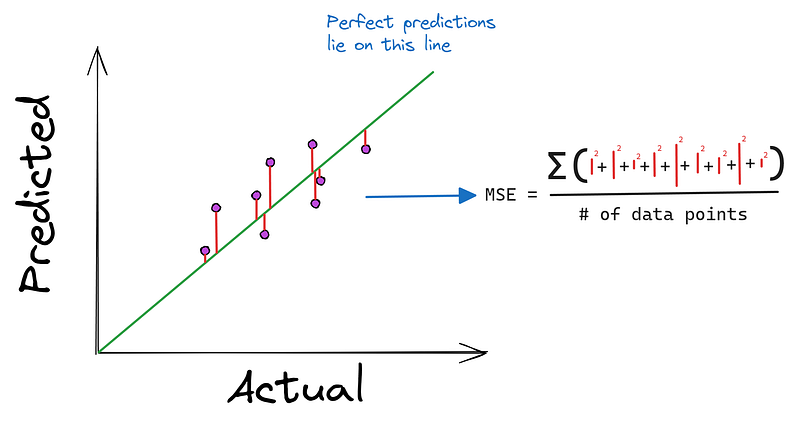

Now, we define a function called `stochastic_gradient_descent` that accepts six arguments:

- `x` and `y` represent the single feature and target in our problem
- `epochs` denotes how many times we want to perform the descent (more on this later)
- `learning_rate` is the step size
- `batch_size` to control how frequently we make parameter updates
- `stopping_threshold` sets the minimum value the loss should decrease at each step

```python
def stochastic_gradient_descent(
    x, y, epochs=100, learning_rate=0.01, batch_size=32, stopping_threshold=1e-6
):
    """
    SGD with support for mini-batches.
    """

    # Initialize the model parameters randomly
    m = np.random.randn()
    b = np.random.randn()
    n = len(x)  # The number of data points
    previous_loss = np.inf
```

Inside the function, we first initialize the parameters we want to optimize with random values (starting at a random location in the hills). We also set initial loss to infinity, representing the unsolved state of our problem.

Then, we start a `for` loop that runs for `epochs` iterations. Inside the loop, we shuffle the data to prevent learning order-dependent patters in the data:

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x = x[indices]
        y = y[indices]
```

Then, we start another loop controlled by the `batch_size` parameter and extract the current batch:

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            x_batch = x[j:j + batch_size]
            y_batch = y[j:j + batch_size]
```

Inside this inner loop, we calculate the gradients (partial derivatives) for both parameters (indicating where we need to step next):

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Make predictions with current m, b
            y_pred = model(m, x_batch, b)
            # Compute the gradients
            m_gradient = 2 * np.mean(x_batch * (y_batch - y_pred))
            b_gradient = 2 * np.mean(y_batch - y_pred)
```

After calculating the gradients, there is a critical step of clipping the gradients:

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ... 
            # Gradient clipping
            clip_value = 1.0
            m_gradient = np.clip(m_gradient, -clip_value, clip_value)
            b_gradient = np.clip(b_gradient, -clip_value, clip_value)
```

Gradient clipping prevents the common _exploding gradients_ problem, where the magnitude of gradients go towards infinity.

After clipping, we update the parameters using the learning rate (we take a step in the direction of the gradients controlled by learning rate):

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # Gradient clipping
            ...
            # Update the model parameters
            m -= learning_rate * m_gradient
            b -= learning_rate * b_gradient
```

Now, under the parent loop (after all batches have been explored), we calculate the loss for the current epoch (look at how far we have descended from our initial position):

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # Gradient clipping
            ...
            # Update the model parameters
            ...
        # Compute the epoch loss
        y_pred = model(m, x, b)
        current_loss = loss(y, y_pred)
```

If the epoch loss is smaller than the `stopping_threshold`, we stop the entire process:

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # Gradient clipping
            ...
            # Update the model parameters
            ...
        # Compute the epoch loss
        ...
        # Check against the stopping threshold
        if abs(previous_loss - current_loss) < stopping_threshold:
            break
        previous_loss = current_loss
```

In the end (after epochs run out or the stopping threshold is met), we return `m` and `b` which are now optimized:

```python
def stochastic_gradient_descent(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # Gradient clipping
            ...
            # Update the model parameters
            ...
        # Compute the epoch loss
        ...
        # Check against the stopping threshold
        ...
    return m, b
```

### SGD With Momentum

Now, let's add momentum to SGD. This version's code ins't much different from the mini-batch version. 

We define a new function with a `momentum` parameter:

```python
def stochastic_gradient_descent_with_momentum(
        x, y, epochs=100, learning_rate=0.01, batch_size=32, 
        stopping_threshold=1e-6, momentum=0.9
):

    """
    SGD with momentum and support for mini-batches.
    """
    # Initialize the model parameters randomly
    m = np.random.randn()
    b = np.random.randn()

    # Initialize velocity terms
    v_m = 0
    v_b = 0
    
    n = len(x)
    previous_loss = np.inf
```

Inside the function, we will define two more variables `v_m` and `v_b` to keep track of the accumulating gradients that will serve as our momentum. We set them to 0 at first, since we don't have any momentum at the start of the algorithm.

Then, the rest of the code is the same until after we clip the gradients:

```python
def sgd_with_momentum(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # Gradient clipping
            ...
            # Update velocity terms
            v_m = momentum * v_m + learning_rate * m_gradient
            v_b = momentum * v_b + learning_rate * b_gradient

            # Update the model parameters using velocity
            m -= v_m
            b -= v_b
```

Once the gradients are clipped, we use the momentum's update rule to modify the velocity terms. Here is a higher-level view of the code:

```py
# Initialize
v_m = 0
v_b = 0

...
# Update velocity terms
v_m = momentum * v_m + learning_rate * m_gradient
v_b = momentum * v_b + learning_rate * b_gradient

# Update the model parameters using velocity
m -= v_m
b -= v_b
```

The velocity `v_*` accumulates gradients over time. This means that if we are moving in a consistent direction, we will build up speed in that direction. 

In areas where the gradient changes rapidly (like narrow valleys in the loss landscape), the momentum helps to dampen oscillations. We develop enough inertia to not get stuck in small local variations such as local minima or saddle points.

The `momentum * v_m` part is what accumulates the gradients. For example, if we have a large positive gradient, then its velocity will be similarly large and the update to the parameter even larger. So, a momentum of 0.9 means we preserve 90% of the velocity of the previous change for the next step. At each step N, we will be using 90% of the total velocity of gradients from N-1 steps.

At this point, I encourage you to come up with some random values to `m` and `b` and their gradients and use the momentum's update rule to see how the parameters change if you go uphill or downhill. 

### RMSprop

Now, let's see RMSprop's implementation. Like SGD with momentum, the major change comes in making parameter updates.

First, we define a new function with two extra parameters, `beta` and  `epsilon` (without momentum):

```python
def rmsprop_optimization(
    x, y, epochs=100, learning_rate=0.01, batch_size=32,
    stopping_threshold=1e-6, beta=0.9, epsilon=1e-8,
):
    """
    RMSprop optimization with support for mini-batches.
    """
    # Initialize the model parameters randomly
    m = np.random.randn()
    b = np.random.randn()

    # Initialize accumulators for squared gradients
    s_m = 0
    s_b = 0

    n = len(x)
    previous_loss = np.inf
```

Also, inside the function, we create two new variables to accumulate _squared gradients_, `s_m` and `s_b`. 

Now, when we get to the update stage, we recalculate the squared gradients and then, update the parameters:

```python
def rmsprop_optimization(...):
    ...
    for i in range(epochs):
        ...
        for j in range(0, n, batch_size):
            # Extract the current batch
            ...
            # Compute the gradients
            ...
            # RMSprop doesn't need gradient clipping
            # Update accumulators
            s_m = beta * s_m + (1 - beta) * (m_gradient**2)
            s_b = beta * s_b + (1 - beta) * (b_gradient**2)

            # Update parameters
            m -= learning_rate * m_gradient / (np.sqrt(s_m) + epsilon)
            b -= learning_rate * b_gradient / (np.sqrt(s_b) + epsilon)

            # The rest of the code is the same
```

Here, we see two new parameters in use:
- `epsilon` is a small value, typically 1e-8 to prevent division by zero when making updates.
- `beta` is the decay rate parameter, usually around 0.9.

The `beta` parameter controls how much history we consider. A higher beta means we take a longer-term view of past gradients, while a lower beta makes the algorithm more responsive to recent gradients. 

You don't need to worry about the math behind the update rule for RMSprop. What's important is the logic behind them. 

Essentially, what the four lines above are doing is:
1. Adapting the learning rate for each parameter, which is crucial as different parameters may require different learning rates.
2. Handling the "vanishing gradient" problem common in neural networks where gradients become too small because of backpropagation. This effect is mitigated by normalizing the gradients.
3. Balancing the step size:
    - For parameters with large gradients (frequently updated), the squared gradient sum in the denominator will be large, reducing the effective learning rate.
    - For parameters with small gradients (infrequently updated), the denominator will be smaller, increasing the effective learning rate.

In practice, RMSprop often performs better than basic SGD or SGD with momentum, especially for non-convex optimization problems often encountered in deep learning. 

## Finally, implementing ADAM in Python

Again, we define a new function:

```python
def adam_optimization(
    x,
    y,
    epochs=100,
    learning_rate=0.001,
    batch_size=32,
    stopping_threshold=1e-6,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-8,
):
    """
    ADAM optimization with support for mini-batches.
    """
    # Initialize the model parameters
    m = np.random.randn()
    b = np.random.randn()

    # Initialize first and second moment vectors
    m_m, v_m = 0, 0
    m_b, v_b = 0, 0

    n = len(x)
    previous_loss = np.inf
    t = 0  # Initialize timestep
```

This time, we define five new variables for capturing first and second moment vectors and the time step. In the context of ADAM:

1. The first moment vector (m):
- It is an estimate of the mean (first moment) of gradients.
- Calculated as exponentially decaying average of past gradients.
- Helps in estimating the direction of the gradient.

2. The second moment vector (v):
- It's an estimate of the uncentered variance (second moment) of the gradients.
- Also calculated as an exponentially decaying average, but of squared gradients.
- Helps in adapting the learning rate for each parameter.

Then, the code is still the same until after we calculate the gradients (we don't need to clip them for ADAM):



## Creating a Comparison Plot of Optimizers

Now, let's see how to generate the summary table we have seen earlier:

In [10]:
comparison_table

,Optimization Method,Runtime (seconds),Actual RMSE
0,SGD,49.6804,1424002054.8658
1,SGD with Momentum,51.9166,14239929470.0458
2,RMSprop,41.6389,137715232.4602
3,ADAM,1.8514,1570.1177


We define a function called `run_optimization` for training a linear regression model using our optimization functions . The function will also capture the runtime and RMSE scores:

In [12]:
import time


def run_optimization(opt_func, x, y, **kwargs):
    # Start a timer
    start_time = time.time()
    
    # Run the optimization function
    m, b = opt_func(x, y, **kwargs)
    
    # End the timer
    end_time = time.time()

    # Run the model on the test set with found parameters
    y_preds = model(m, test_xy[:, 0], b)
    y_preds_denormalized = y_preds * std[1] + mean[1]
    y_true_denormalized = test_xy[:, 1] * std[1] + mean[1]
    
    # Compute MSE and RMSE
    actual_mse = np.mean((y_true_denormalized - y_preds_denormalized) ** 2)

    return end_time - start_time, np.sqrt(actual_mse)

Now, we will call this function four times for each of our optimization functions, storing the results into a list where each item is a three-tuple (algorithm name, run time in seconds, RMSE score):

```python
# Run all optimization methods
results = []

results.append(
    (
        "SGD",
        *run_optimization(
            stochastic_gradient_descent,
            train_xy[:, 0],
            train_xy[:, 1],
            learning_rate=0.1,
            epochs=10000,
            batch_size=64,
        ),
    )
)

results.append(
    (
        "SGD with Momentum",
        *run_optimization(
            stochastic_gradient_descent_with_momentum,
            train_xy[:, 0],
            train_xy[:, 1],
            learning_rate=0.1,
            epochs=10000,
            batch_size=64,
            momentum=0.9,
        ),
    )
)

results.append(
    (
        "RMSprop",
        *run_optimization(
            rmsprop_optimization,
            train_xy[:, 0],
            train_xy[:, 1],
            learning_rate=0.01,
            epochs=10000,
            batch_size=64,
            beta=0.9,
            epsilon=1e-8,
        ),
    )
)

results.append(
    (
        "ADAM",
        *run_optimization(
            adam_optimization,
            train_xy[:, 0],
            train_xy[:, 1],
            learning_rate=0.01,
            epochs=10000,
            batch_size=64,
            beta1=0.9,
            beta2=0.999,
            epsilon=1e-8,
        ),
    )
)
```

For a fair comparison, we keep the learning rate, the number of epochs and the batch size the same. 

Afterwards, we can create our table:

```python
from tabulate import tabulate  # pip install tabulate

# Create and print the table
headers = ["Optimization Method", "Runtime (seconds)", "Actual RMSE"]
print(tabulate(results, headers=headers, floatfmt=".4f"))

# Save the table
pd.DataFrame(results, columns=headers).to_csv("optimization_results.csv", index=False)
```

Here is the final result:

```python
Optimization Method      Runtime (seconds)       Actual RMSE
---------------------  -------------------  ----------------
SGD                                49.9305   1424002054.8658
SGD with Momentum                  50.7744  14239929470.0458
RMSprop                            41.9895    137715232.4602
ADAM                                1.8462         1570.1177
```

Before continuing, I encourage to play around with the parameters of each optimization function. It is likely that you can make each, especially ADAM, even faster and more accurate by adjusting the learning rate, increasing batch size or controlling bias.

See the conclusion section for links to the full code of the comparison script and how to create the plot we have seen at the beginning.

## Using ADAM in Pytorch

## Conclusion